In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('df_eng.csv',index_col='data_hora',parse_dates=True)
df =df.asfreq('W')

<h3>SARIMAX - Temp. Max (C)</h3>

In [4]:
target = df['Radiacao (KJ/m²)']
exog = df['Temp. Max. (C)']

In [5]:
train_size = int(len(target) * 0.75)
train, test = target.iloc[:train_size], target.iloc[train_size:]
exog_train, exog_test = exog[0:train_size], exog[train_size:(len(exog))]

In [6]:
print(len(exog_train),exog_train.shape)
print(len(train),train.shape)
print(len(exog_test),exog_test.shape)
print(len(test),test.shape)

78 (78,)
78 (78,)
27 (27,)
27 (27,)


In [7]:
model = auto_arima(train, exogenous = exog_train, seasonal=True, m=52,stepwise=True,suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   78
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -525.195
Date:                Mon, 24 Feb 2025   AIC                           1056.390
Time:                        14:44:48   BIC                           1063.460
Sample:                    01-29-2023   HQIC                          1059.220
                         - 07-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1574.4769     35.702     44.101      0.000    1504.502    1644.451
ma.L1          0.4107      0.093      4.403      0.000       0.228       0.594
sigma2       4.12e+04   7262.952      5.673      0.0

In [8]:
model = SARIMAX(train, exog=exog_train, order=model.order, seasonal_order=model.seasonal_order)

In [9]:
model_fit = model.fit(disp=False)

In [10]:
forecast = model_fit.get_forecast(steps=27,exog=exog_test)

In [11]:
#O predicted_mean traz a previsão central para os próximos períodos

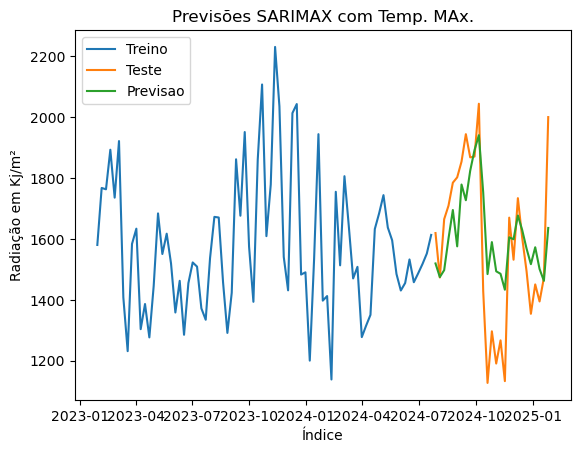

In [12]:
plt.plot(figsize=(18,18))
plt.plot(train,label="Treino")
plt.plot(test,label="Teste")
plt.plot(forecast.predicted_mean,label="Previsao")
#plt.plot(forecast.conf_int,label="Intervalo de confiança")
plt.title("Previsões SARIMAX com Temp. MAx.")
plt.xlabel("Índice")
plt.ylabel("Radiação em Kj/m²")
plt.legend()
plt.show()

In [13]:
predicted_values = forecast.predicted_mean

In [14]:
mae = mean_absolute_error(test, predicted_values)
rmse = np.sqrt(mean_squared_error(test, predicted_values))
mape = mean_absolute_percentage_error(test, predicted_values)
# Exibe as métricas calculadas
print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 148.33
The RMSE is 185.25
The MAPE is 10.20 %


<h3>SARIMAX -Temp. Ins</h3>

In [15]:
#Separando as variáveis de treino e teste
target = df['Radiacao (KJ/m²)']
exog = df['Temp. Ins. (C)']
#Separando os dados em treino e teste
train_size = int(len(target) * 0.75)
train, test = target.iloc[:train_size], target.iloc[train_size:]
exog_train, exog_test = exog[0:train_size], exog[train_size:(len(exog))]


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   78
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -525.195
Date:                Mon, 24 Feb 2025   AIC                           1056.390
Time:                        14:44:57   BIC                           1063.460
Sample:                    01-29-2023   HQIC                          1059.220
                         - 07-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1574.4769     35.702     44.101      0.000    1504.502    1644.451
ma.L1          0.4107      0.093      4.403      0.000       0.228       0.594
sigma2       4.12e+04   7262.952      5.673      0.0

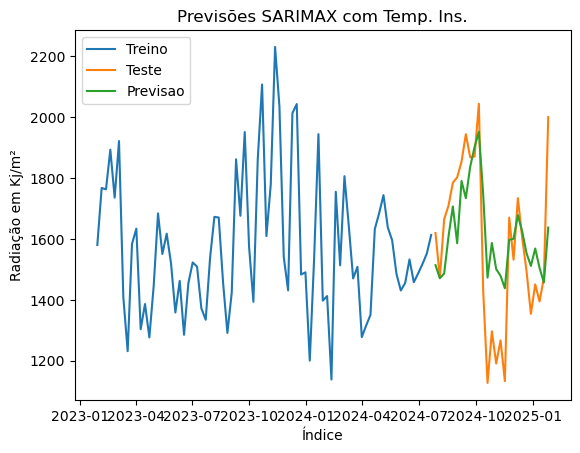

In [16]:
#Plotando o modelo
model = auto_arima(train, exogenous = exog_train, seasonal=True, m=52,stepwise=True,suppress_warnings=True)
print(model.summary())
#Treinando o modelo
model = SARIMAX(train, exog=exog_train, order=model.order, seasonal_order=model.seasonal_order)
#Model fit
model_fit = model.fit(disp=False)
#Previsao - onde recebemos os dados - dividir celulas 
forecast = model_fit.get_forecast(steps=27,exog=exog_test)
#Gráfico
plt.plot(figsize=(18,18))
plt.plot(train,label="Treino")
plt.plot(test,label="Teste")
plt.plot(forecast.predicted_mean,label="Previsao")
plt.title("Previsões SARIMAX com Temp. Ins.")
plt.xlabel("Índice")
plt.ylabel("Radiação em Kj/m²")
plt.legend()
plt.show()

In [17]:
predicted_values = forecast.predicted_mean

In [18]:
mae = mean_absolute_error(test, predicted_values)
rmse = np.sqrt(mean_squared_error(test, predicted_values))
mape = mean_absolute_percentage_error(test, predicted_values)
# Exibe as métricas calculadas
print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 145.58
The RMSE is 182.82
The MAPE is 10.03 %


<h3>SARIMAX - Umidade Mínima</h3>

In [19]:
#Separando as variáveis de treino e teste
target = df['Radiacao (KJ/m²)']
exog = df['Umi. Min. (%)']
#Separando os dados em treino e teste
train_size = int(len(target) * 0.75)
train, test = target.iloc[:train_size], target.iloc[train_size:]
exog_train, exog_test = exog[0:train_size], exog[train_size:(len(exog))]

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   78
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -525.195
Date:                Mon, 24 Feb 2025   AIC                           1056.390
Time:                        14:45:05   BIC                           1063.460
Sample:                    01-29-2023   HQIC                          1059.220
                         - 07-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1574.4769     35.702     44.101      0.000    1504.502    1644.451
ma.L1          0.4107      0.093      4.403      0.000       0.228       0.594
sigma2       4.12e+04   7262.952      5.673      0.0

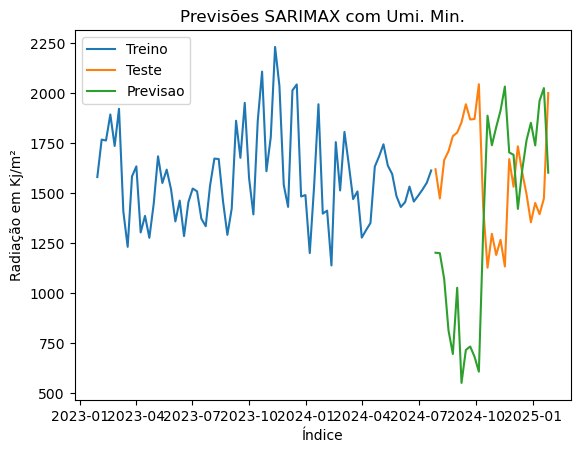

In [20]:
#Plotando o modelo
model = auto_arima(train, exogenous = exog_train, seasonal=True, m=52,stepwise=True,suppress_warnings=True)
print(model.summary())
#Treinando o modelo
model = SARIMAX(train, exog=exog_train, order=model.order, seasonal_order=model.seasonal_order)
#Model fit
model_fit = model.fit(disp=False)
#Previsao 
forecast = model_fit.get_forecast(steps=27,exog=exog_test)
#Gráfico
plt.plot(figsize=(18,18))
plt.plot(train,label="Treino")
plt.plot(test,label="Teste")
plt.plot(forecast.predicted_mean,label="Previsao")
plt.title("Previsões SARIMAX com Umi. Min.")
plt.xlabel("Índice")
plt.ylabel("Radiação em Kj/m²")
plt.legend()
plt.show()

In [21]:
predicted_values = forecast.predicted_mean
mae = mean_absolute_error(test, predicted_values)
rmse = np.sqrt(mean_squared_error(test, predicted_values))
mape = mean_absolute_percentage_error(test, predicted_values)
# Exibe as métricas calculadas
print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 627.08
The RMSE is 742.76
The MAPE is 39.34 %


<h3>SARIMAX - Temp. Min. (C)</h3>

In [22]:
#Separando as variáveis de treino e teste
target = df['Radiacao (KJ/m²)']
exog = df['Temp. Min. (C)']
#Separando os dados em treino e teste
train_size = int(len(target) * 0.75)
train, test = target.iloc[:train_size], target.iloc[train_size:]
exog_train, exog_test = exog[0:train_size], exog[train_size:(len(exog))]

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   78
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -525.195
Date:                Mon, 24 Feb 2025   AIC                           1056.390
Time:                        14:45:13   BIC                           1063.460
Sample:                    01-29-2023   HQIC                          1059.220
                         - 07-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1574.4769     35.702     44.101      0.000    1504.502    1644.451
ma.L1          0.4107      0.093      4.403      0.000       0.228       0.594
sigma2       4.12e+04   7262.952      5.673      0.0

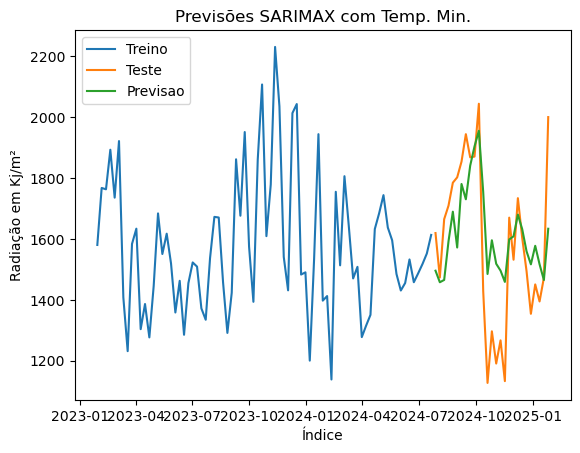

In [23]:
#Plotando o modelo
model = auto_arima(train, exogenous = exog_train, seasonal=True, m=52,stepwise=True,suppress_warnings=True)
print(model.summary())
#Treinando o modelo
model = SARIMAX(train, exog=exog_train, order=model.order, seasonal_order=model.seasonal_order)
#Model fit
model_fit = model.fit(disp=False)
#Previsao 
forecast = model_fit.get_forecast(steps=27,exog=exog_test)
#Gráfico
plt.plot(figsize=(18,18))
plt.plot(train,label="Treino")
plt.plot(test,label="Teste")
plt.plot(forecast.predicted_mean,label="Previsao")
plt.title("Previsões SARIMAX com Temp. Min.")
plt.xlabel("Índice")
plt.ylabel("Radiação em Kj/m²")
plt.legend()
plt.show()

In [24]:
predicted_values = forecast.predicted_mean
mae = mean_absolute_error(test, predicted_values)
rmse = np.sqrt(mean_squared_error(test, predicted_values))
mape = mean_absolute_percentage_error(test, predicted_values)
# Exibe as métricas calculadas
print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 154.28
The RMSE is 191.71
The MAPE is 10.63 %


<h3>SARIMAX train_test_split - testes</h3>

In [25]:
#Separando as variáveis de treino e teste
target = df['Radiacao (KJ/m²)']
exog = df['Temp. Ins. (C)']
#Separando os dados em treino e teste
train_size = int(len(target) * 0.90)
train, test = target.iloc[:train_size], target.iloc[train_size:]
exog_train, exog_test = exog[0:train_size], exog[train_size:(len(exog))]

In [26]:
print(len(exog_train),exog_train.shape)
print(len(train),train.shape)
print(len(exog_test),exog_test.shape)
print(len(test),test.shape)

94 (94,)
94 (94,)
11 (11,)
11 (11,)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   94
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -634.221
Date:                Mon, 24 Feb 2025   AIC                           1274.442
Time:                        14:46:06   BIC                           1282.072
Sample:                    01-29-2023   HQIC                          1277.524
                         - 11-10-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1581.3987     32.803     48.209      0.000    1517.106    1645.691
ma.L1          0.4755      0.079      5.997      0.000       0.320       0.631
sigma2      4.234e+04   7101.648      5.962      0.0

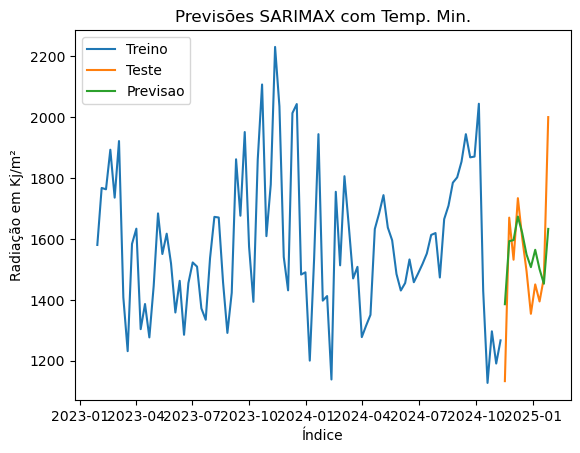

In [30]:
#Plotando o modelo
model = auto_arima(train, exogenous = exog_train, seasonal=True, m=52,stepwise=True,suppress_warnings=True)
print(model.summary())
#Treinando o modelo
model = SARIMAX(train, exog=exog_train, order=model.order, seasonal_order=model.seasonal_order)
#Model fit
model_fit = model.fit(disp=False)
#Previsao 
forecast = model_fit.get_forecast(steps=11,exog=exog_test)
#Gráfico
plt.plot(figsize=(18,18))
plt.plot(train,label="Treino")
plt.plot(test,label="Teste")
plt.plot(forecast.predicted_mean,label="Previsao")
plt.title("Previsões SARIMAX com Temp. Min.")
plt.xlabel("Índice")
plt.ylabel("Radiação em Kj/m²")
plt.legend()
plt.show()

In [28]:
predicted_values = forecast.predicted_mean
mae = mean_absolute_error(test, predicted_values)
rmse = np.sqrt(mean_squared_error(test, predicted_values))
mape = mean_absolute_percentage_error(test, predicted_values)
# Exibe as métricas calculadas
print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 116.89
The RMSE is 154.85
The MAPE is 7.80 %


In [52]:
print(test)

data_hora
2024-11-17    1132.885714
2024-11-24    1669.900000
2024-12-01    1531.675000
2024-12-08    1733.853571
2024-12-15    1602.988095
2024-12-22    1494.103571
2024-12-29    1354.070238
2025-01-05    1450.613095
2025-01-12    1394.551190
2025-01-19    1472.630952
2025-01-26    2000.155000
Freq: W-SUN, Name: Radiacao (KJ/m²), dtype: float64


In [35]:
model_cv = ARIMA(order = (0,0,1),seasonal_order=(1,1,1,52))

TypeError: ARIMA.__init__() missing 1 required positional argument: 'endog'